<a href="https://colab.research.google.com/github/zyx20180209/test2023/blob/main/fashion_minst.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# rescale
train_images = train_images / 255.0

test_images = test_images / 255.0

# train validation split
validation_images = train_images[-5000:]
validation_labels = train_labels[-5000:]

train_images = train_images[:-5000]
train_labels = train_labels[:-5000]

split the model into encoder and decoder

In [6]:
encoder = tf.keras.Sequential([ 
    tf.keras.layers.Flatten(input_shape=(28,28)), 
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(64, activation='relu') 
]) 

decoder = tf.keras.Sequential([ 
    tf.keras.layers.Dense(128, activation='relu'),  
    tf.keras.layers.Dense(784, activation='sigmoid'),
    tf.keras.layers.Reshape((28, 28))
]) 
autoencoder = tf.keras.Sequential([ 
    encoder,
    decoder 
]) 

In [7]:
def rounded_accuracy(y_true, y_pred): 
  return tf.keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [8]:
autoencoder.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=1.5), 
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[rounded_accuracy]
) 

In [9]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True) 

In [10]:
history = autoencoder.fit(train_images, train_images, batch_size=32, 
                          epochs=100, callbacks=early_stopping, verbose = 0,
                          validation_data=(validation_images, validation_images)) 

In [11]:
# training and validation loss
validation_losses = history.history['val_loss']
losses = history.history['loss']

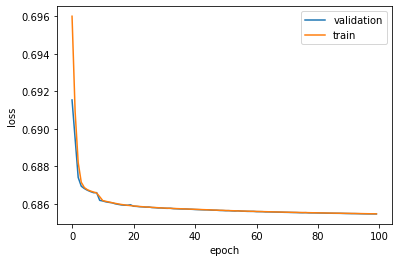

In [12]:
plt.plot(validation_losses, label='validation')
plt.plot(losses, label='train')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [13]:
# use autoencoder to predict first 5 images in the dataset
test5 = test_images[0:5]
predict5 = autoencoder.predict(test5)

1/1 [==============================] - 0s 207ms/step


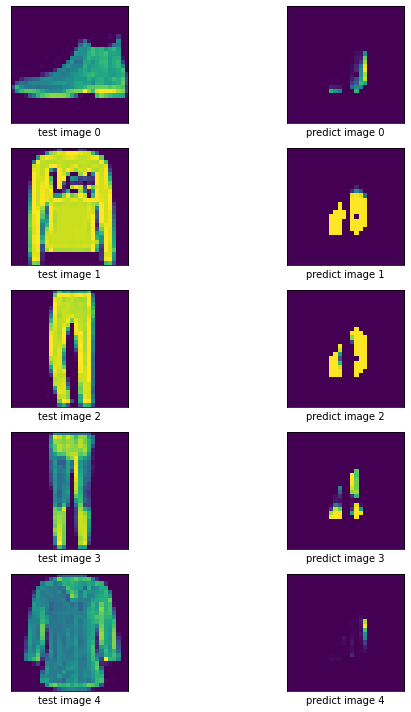

In [14]:
# plot the original image and predicted image
plt.figure(figsize=(10,10))
i = 0
while i <= 4:
    plt.subplot(5, 2, 2*i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test5[i])
    plt.xlabel("test image "+str(i))
    
    plt.subplot(5, 2, 2*i+2)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(predict5[i])
    plt.xlabel("predict image "+str(i))
    i += 1

plt.tight_layout()

In [15]:
# fix the encoder part and try a new second half model
encoder.trainable=False
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [16]:
# encoder is froze in previous part
train_x = train_images[:3000]
train_y = train_labels[:3000]
train_y = tf.one_hot(train_y, depth=10, dtype=tf.float64) 

In [17]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=tf.keras.metrics.CategoricalAccuracy()
)

In [18]:
model.fit(train_x, train_y, batch_size=32,
          epochs=100, callbacks=early_stopping, verbose = 0,
          validation_split = 0.2) 

In [19]:
test_labels  = tf.one_hot(test_labels, depth=10, dtype=tf.float64) 

In [20]:
model.evaluate(test_images, test_labels) 

313/313 [==============================] - 1s 3ms/step - loss: 0.9926 - categorical_accuracy: 0.6361


[0.9925983548164368, 0.6360999941825867]